In [12]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import datetime as date
from sklearn.metrics import mean_absolute_error
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [21]:
main_df =         pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
holdout_df =      pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')
mini_holdout_df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')

In [22]:
main_df["Year Sold"] =         [int(main_df['date'].loc[i][:4])         for i in range(len(main_df['date']))]
holdout_df["Year Sold"] =      [int(holdout_df['date'].loc[i][:4])      for i in range(len(holdout_df['date']))]
mini_holdout_df["Year Sold"] = [int(mini_holdout_df['date'].loc[i][:4]) for i in range(len(mini_holdout_df['date']))]

main_df["Month Sold"] =         [int(main_df['date'].loc[i][4:6])         for i in range(len(main_df['date']))]
holdout_df["Month Sold"] =      [int(holdout_df['date'].loc[i][4:6])      for i in range(len(holdout_df['date']))]
mini_holdout_df["Month Sold"] = [int(mini_holdout_df['date'].loc[i][4:6]) for i in range(len(mini_holdout_df['date']))]

main_df["Day Sold"] =         [int(main_df['date'].loc[i][6:8])         for i in range(len(main_df['date']))]
holdout_df["Day Sold"] =      [int(holdout_df['date'].loc[i][6:8])      for i in range(len(holdout_df['date']))]
mini_holdout_df["Day Sold"] = [int(mini_holdout_df['date'].loc[i][6:8]) for i in range(len(mini_holdout_df['date']))]

# main_df.drop('date')
# for i in range(len(main_df['Date New'])):
#     main_df['Date New'].loc[i] = int(main_df['Date New'].loc[i][:4])

# holdout_df["Date New"] = holdout_df['date']
# for i in range(len(holdout_df['Date New'])): holdout_df['Date New'].loc[i] = int(holdout_df['Date New'].loc[i][:4])

# mini_holdout_df["Date New"] = mini_holdout_df['date']
# for i in range(len(mini_holdout_df['Date New'])): mini_holdout_df['Date New'].loc[i] = int(mini_holdout_df['Date New'].loc[i][:4])

# main_df.head()
# mini_holdout_df.head()
# main_df['Date New'].dtypes

In [23]:
main_df = main_df.drop(['date'], axis=1)
main_df = pd.get_dummies(main_df, columns=['long', 'lat', 'zipcode'], drop_first=True)
main_df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  1565930130         4       3.25         3760      4675     2.0           0   
1  3279000420         3       1.75         1460      7800     1.0           0   
2   194000575         4       1.00         1340      5800     1.5           0   
3  2115510160         3       1.75         1440      8050     1.0           0   
4  7522500005         2       1.50         1780      4750     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      8  ...              0              0              0   
1     0          2      7  ...              0              0              0   
2     2          3      7  ...              0              0              0   
3     0          3      8  ...              0              0              0   
4     0          4      7  ...              0              0              0   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98198  zipcode_98199  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  

[5 rows x 5802 columns]

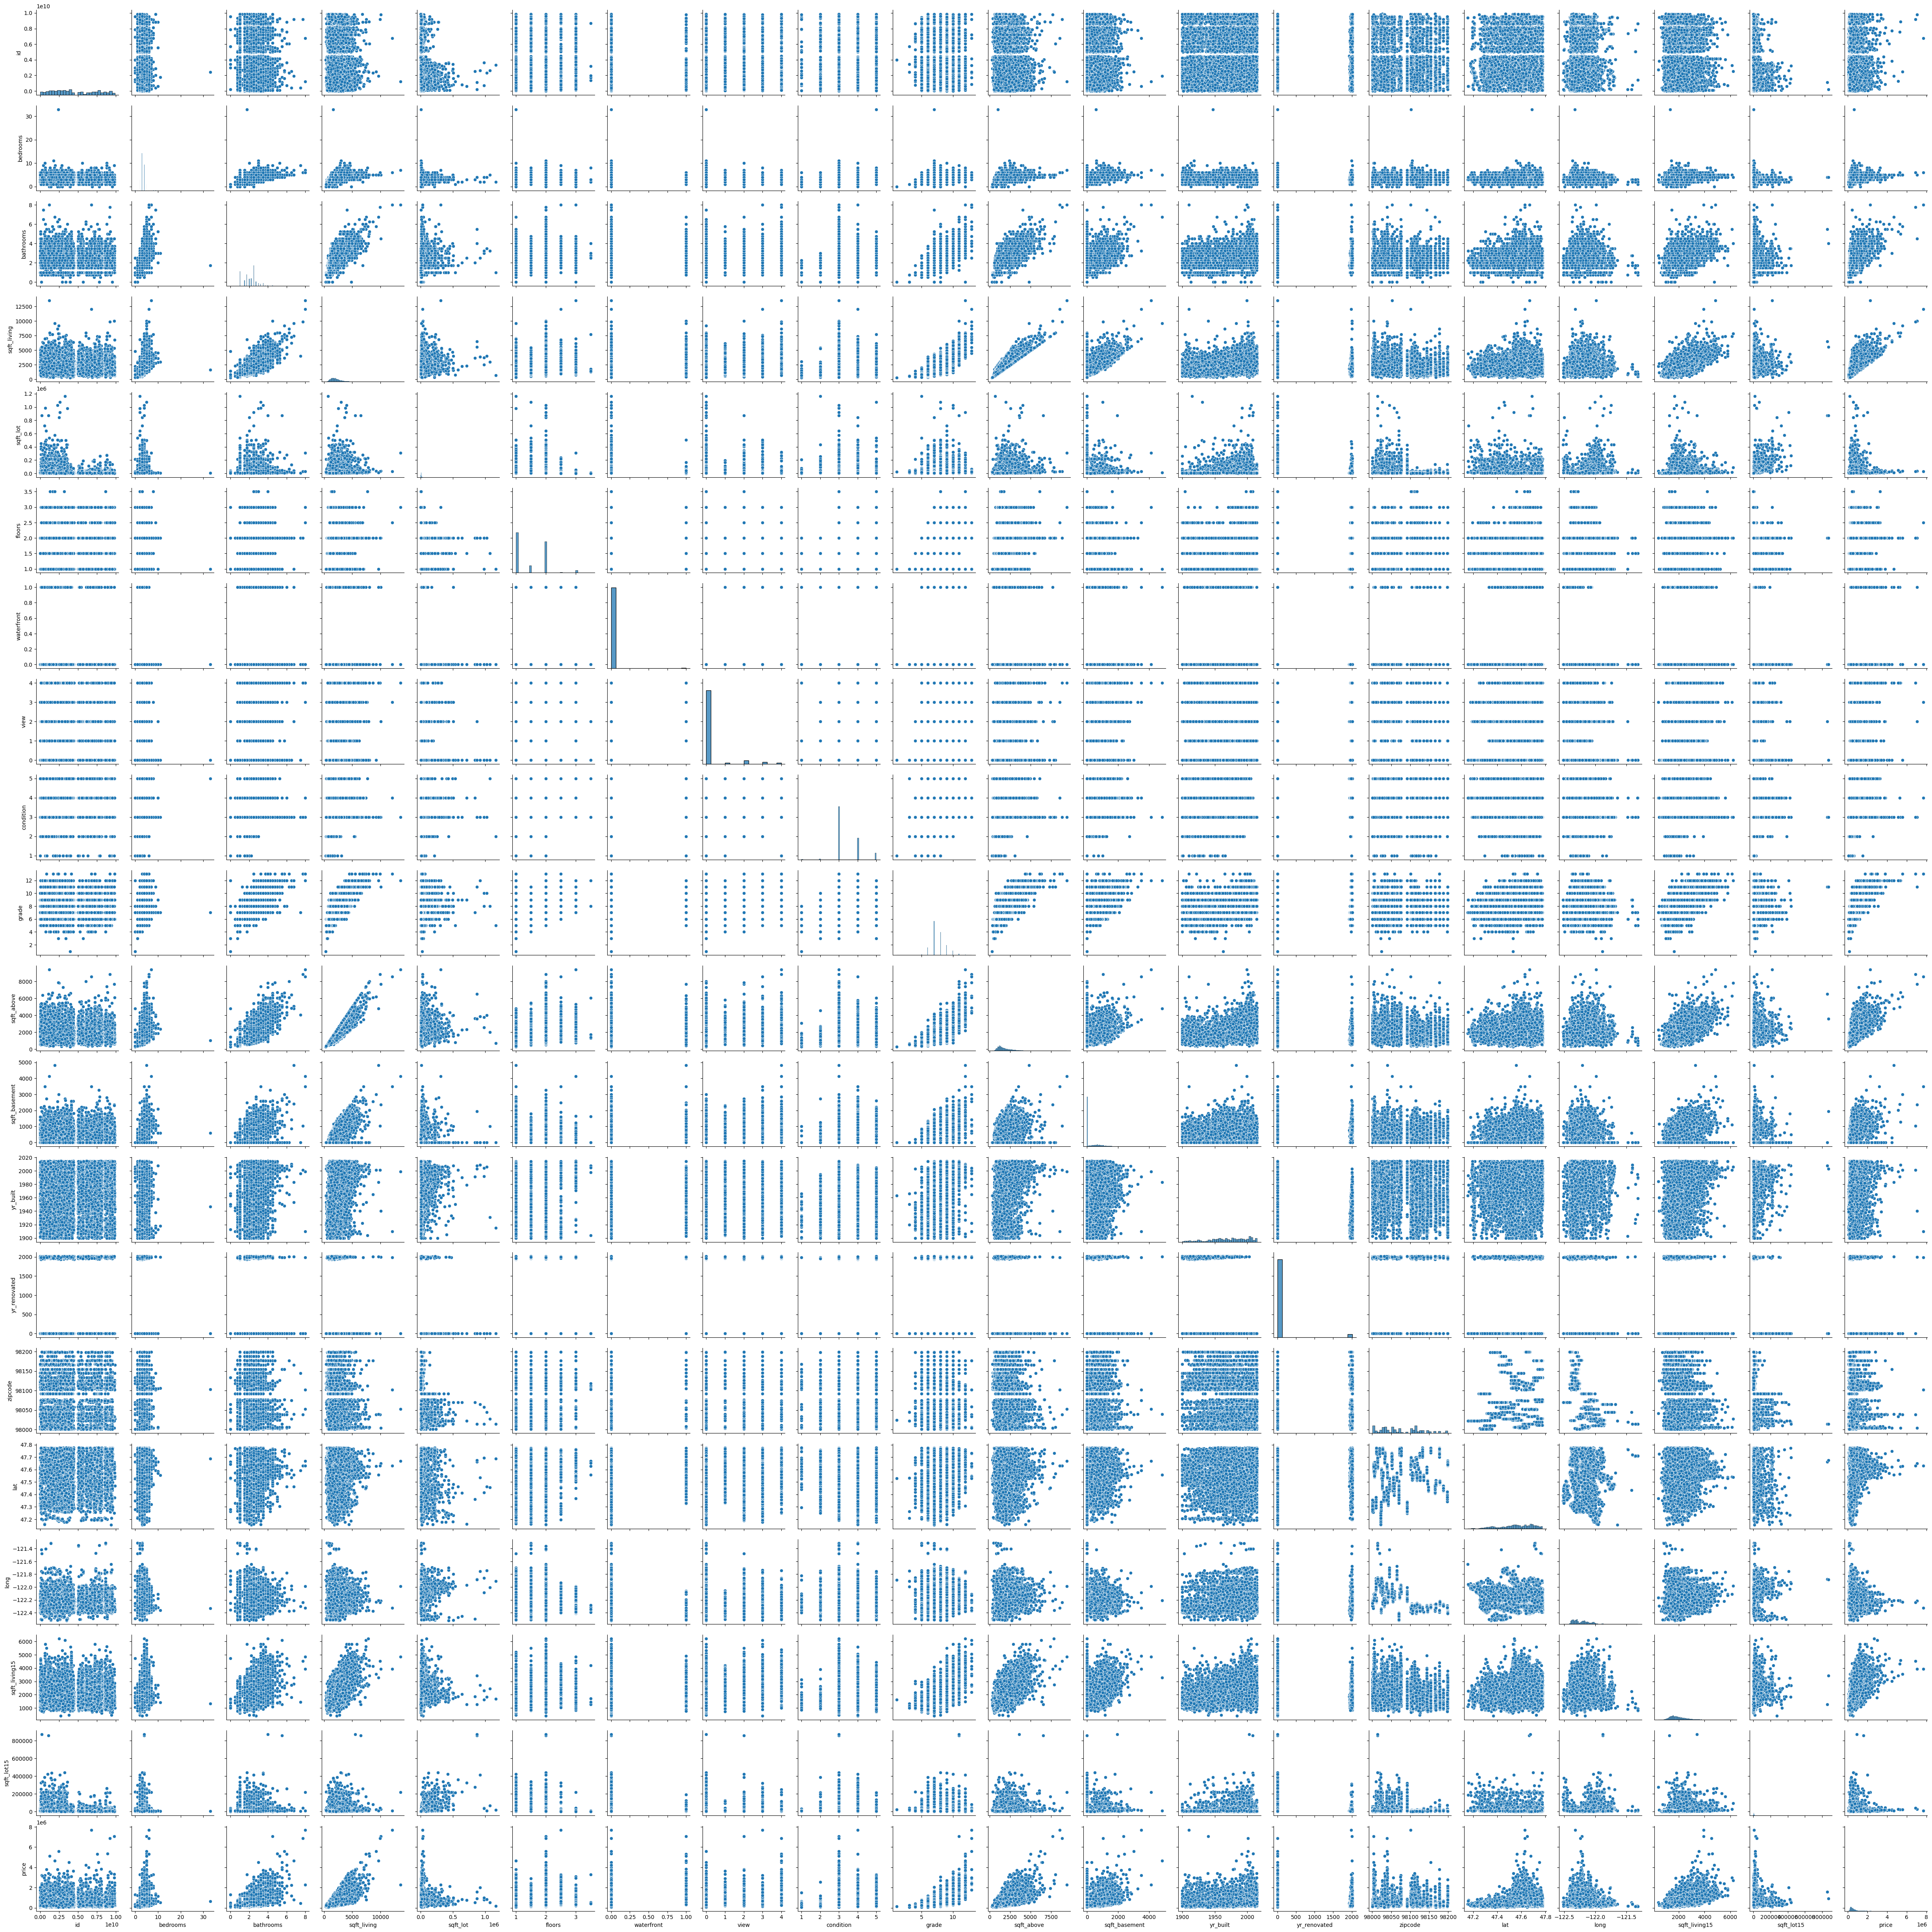

In [78]:
# sns.pairplot(main_df)

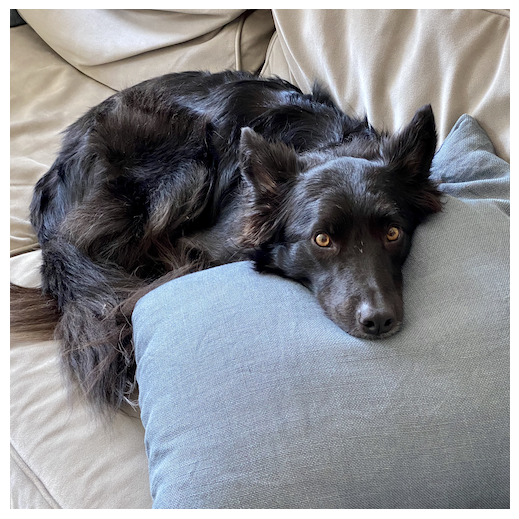

In [136]:
# sns.scatterplot(main_df, x='bedrooms', y='bathrooms', hue='sqft_lot')
# sns.scatterplot(main_df, x='yr_built', y='sqft_lot')
# sns.scatterplot(main_df, x='yr_built', y='sqft_living')
# sns.scatterplot(main_df, x='yr_built', y='price', hue='view')
# sns.scatterplot(main_df, x='sqft_lot', y='price')
# sns.scatterplot(main_df, x='yr_built', y='Year Sold', hue='price')
# sns.jointplot(main_df, x='yr_built', y='Year Sold')


# sns.boxenplot(main_df, x='price')
# sns.scatterplot(main_df, x='sqft_lot', y='price', hue='yr_built')
# sns.boxplot(main_df, x='Year Sold', y='price')
# sns.violinplot(main_df, x='Year Sold', y='price')
# sns.lineplot(main_df, x='yr_built', y='price')
# sns.countplot(main_df, x='Year Sold')
# sns.histplot(main_df, x='yr_built', y='price')
# sns.countplot(main_df, x='yr_built')
# sns.barplot(main_df, x='condition', y='price')
# main_df.columns
# import cartopy.crs as crs
# import cartopy.feature as cfeature
# fig = plt.figure(figsize=(12,10))

# ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

# ax.stock_img()
# ax.coastlines()
# ax.add_feature(cfeature.STATES)

# # ax.set_extent([-125, -120, 45.5, 49.5], crs=crs.PlateCarree())
# ax.set_extent([-123, -121, 47, 48], crs=crs.PlateCarree())

# plt.scatter(x=main_df.long, y=main_df.lat, c=main_df.price, alpha=0.8, transform=crs.PlateCarree(), label = main_df.zipcode)
# plt.show()
# outline washington
# long1lat
# hue = price


In [6]:
biggest_index = 0
biggest_val = 0
for i in range(len(main_df)):
    if main_df['sqft_lot'][i] > biggest_val:
        biggest_val = main_df['sqft_lot'][i]
        biggest_index = i

print(biggest_index, biggest_val)
print(main_df['long'][biggest_index], main_df['lat'][biggest_index], main_df['yr_built'][biggest_index], main_df['zipcode'][biggest_index], main_df['price'][biggest_index])

10003 1164794
-121.909 47.6888 1915 98014 190000.0


In [7]:
# Clean up Data of null values
for column in main_df.columns:
    main_df[column].fillna(0)


In [7]:
main_df.columns

Index(['id', 'date', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated',
       ...
       'Day Sold_22', 'Day Sold_23', 'Day Sold_24', 'Day Sold_25',
       'Day Sold_26', 'Day Sold_27', 'Day Sold_28', 'Day Sold_29',
       'Day Sold_30', 'Day Sold_31'],
      dtype='object', length=300)

In [25]:
XGBoost = xgb.XGBRegressor(max_depth = 4, random_state=11, n_estimators=500)

# min_child_weight = 5,
# callbacks=None,
# colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
# early_stopping_rounds=None, enable_categorical=False,
# eval_metric=None, grow_policy='depthwise',
# importance_type=None, interaction_constraints='',
# learning_rate=0.300000012, max_cat_to_onehot=4,
# max_delta_step=0, max_leaves=0, min_child_weight=1,
# missing=nan, monotone_constraints='()'

# X = main_df[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#        'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#        'sqft_living15', 'sqft_lot15', 'Date New']]

# X = main_df[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#        'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#        'sqft_living15', 'Year Sold', 'Month Sold', 'Day Sold']]
X = main_df.drop(['price'], axis=1)

y = main_df['price']

# ros = RandomOverSampler(random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# xee, yee = ros.fit_resample(X_train, y_train)

XGBoost.fit(X_train, y_train)


: 

: 

In [ ]:
predictions = XGBoost.predict(X_test)
mean_squared_error(y_test, predictions, squared=False)

132953.44956224237

mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

In [3]:
 

# _, X_val, _, y_val = train_test_split(X, yee, test_size=0.2, random_state=42)]]

x_holdout = holdout_df[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'Year Sold', 'Month Sold', 'Day Sold']]

predictions = XGBoost.predict(x_holdout)
y_mini = pd.DataFrame()
y_mini['price'] = predictions
y_mini.to_csv('holdout-module3-team4-predictions.csv', index=False)

KeyError: "['Year Sold', 'Month Sold', 'Day Sold'] not in index"

In [64]:
importances = pd.DataFrame({
    'Attribute': X_train.columns,
    'Importance': XGBoost.feature_importances_
})
for i in range(len(importances)):
    importances['Importance'].loc[i] = importances["Importance"].loc[i] * 100
importances.sort_values(by='Importance', ascending=False)

/tmp/ipykernel_52437/632526862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importances['Importance'].loc[i] = importances["Importance"].loc[i] * 100


Attribute  Importance
9           grade   39.364037
3     sqft_living   13.626356
7            view   11.182470
6      waterfront    8.806631
15            lat    8.530694
16           long    3.896056
2       bathrooms    2.284075
8       condition    1.842333
14        zipcode    1.520706
17  sqft_living15    1.510587
12       yr_built    1.324660
13   yr_renovated    1.277258
18      Year Sold    1.090511
10     sqft_above    0.761438
5          floors    0.597349
11  sqft_basement    0.509172
1        bedrooms    0.469685
0              id    0.462610
4        sqft_lot    0.447579
19     Month Sold    0.315780
20       Day Sold    0.180013

ValueError: Unknown format code 'f' for object of type 'str'